# ***Linear Discriminant Analysis to classify the species of Iris flowers***

>[Linear Discriminant Analysis to classify the species of Iris flowers](#scrollTo=UuhsNxVIhmCC)

>[Introduction:](#scrollTo=gk9eHRHZcWvT)

>[Objective:](#scrollTo=gk9eHRHZcWvT)

>[Data Dictionary:](#scrollTo=9NcmW5bKDDbt)

>[Exploratory Data Analysis:](#scrollTo=yj2EdudfE0d3)

>>[Data Preprocessing:](#scrollTo=Nr4VOnUiKbJn)

>>[Correlation:](#scrollTo=ZkXbr62CY5NQ)

>>[Linear Discriminant Analysis using mathematical concepts:](#scrollTo=hninbk1TZcJH)

>>>[Feature wise Aggregation](#scrollTo=hninbk1TZcJH)

>>>[Within class Scatter Matrix](#scrollTo=DmZs5BE90PxD)

>>>[Between class Scatter Matrix](#scrollTo=C1OIwZrY11kT)

>>>[Eigen Vector and Eigen Values:](#scrollTo=77Xm1Aq23HRw)

>>>[Data Segregation](#scrollTo=2BZrRYI_5UBS)

>>>[Graphical Visualization](#scrollTo=q9VAN4ml7Ubj)

>>[Linear Discriminant Analysis using scikit-learn library](#scrollTo=rOaZEi7R7BhP)

>>[Dimensionality reduction and Classification using LDA:](#scrollTo=VlCoURgJ9utX)

>>>[LDA model on training data](#scrollTo=RMLxgZzJ_03I)

>>>[Model Accuracy](#scrollTo=OoQ2bN-v_618)

>>[Conclusions:](#scrollTo=5KbsirHKAjEN)



# Introduction:
Linear Discriminant Analysis (LDA) is a machine learning technique used for classification, particularly helpful for identifying patterns that distinguish between multiple classes in data. It's particularly useful when the data distribution is approximately normal and when classes are separable linearly. LDA operates by finding a linear combination of features that characterizes or separates two or more classes. It aims to maximize the between-class variance while minimizing the within-class variance in the data, ensuring that the classes are as distinct as possible in the resulting lower-dimensional space. The method involves projecting the data points onto a line (in the simplest case) so that the classes are as far apart as possible and the instances within each class are as close together as possible.

# Objective:
To build a predictive model that can accurately classify the species of Iris flowers based on the provided features. Using Linear Discriminant Analysis (LDA) model, the dataset is projected onto a lower-dimensional space with good class-separability.


Downloading necessary packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Dictionary:

The dataset is taken from Kaggle website: https://www.kaggle.com/datasets/uciml/iris. It was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It contains 150 observations of iris flowers from three different species. Each row represents a unique Iris flower.

The following columns are described as:
> 0. Id: A unique id assigned for each flower
> 1. Sepal Length: This attribute represents the length of the sepal, which is the outermost whorl of a flower. It is measured in centimeters (cm).
> 2. Sepal Width: This attribute represents the width of the sepal, which is measured perpendicular to its length. It is also measured in centimeters (cm).
> 3. Petal Length: This attribute represents the length of the petal, which is the innermost whorl of a flower. It is measured in centimeters (cm).
> 4. Petal Width: This attribute represents the width of the petal, which is measured perpendicular to its length. It is also measured in centimeters (cm).
> 5. Species: The species of iris flower, which can be, Iris Setosa, Iris Versicolor,or Iris Virginica.


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data  = data.drop('Id',axis=1)

As ID is of no use in further analysis and algorithmic purposes, it is a redundant column here, thereby we remove it before proceeding further.

# Exploratory Data Analysis:

In [ ]:
data.shape

(150, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB



The data comprises of 150 observations corresponding to 5 columns. All the
variables are numeric(in cm) with float data type except the type of species.

In [ ]:
null_values = data.isnull().sum()
print("Null Values:")
print(null_values)

Null Values:
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64




There are no null values in the data



In [ ]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The average sepal length across all samples is approximately 5.84 cm, with a standard deviation of 0.83 cm. This means that most sepals are around this length, but there can be a variation of about 0.83 cm.

The shortest sepal is 4.3 cm, and the longest is 7.9 cm.

The average sepal width is about 3.05 cm, with a standard deviation of 0.43 cm.
The narrowest sepal is 2.0 cm, and the widest is 4.4 cm.

Half of the sepals have a width between 2.8 cm and 3.3 cm.

The average petal length is approximately 3.76 cm, with a standard deviation of 1.76 cm, indicating a higher variability in petal length compared to sepal dimensions.

The shortest petal is 1.0 cm, and the longest is 6.9 cm.

Half of the petals have a length between 1.6 cm and 5.1 cm.


The average petal width is about 1.20 cm, with a standard deviation of 0.76 cm.

The narrowest petal is 0.1 cm, and the widest is 2.5 cm.

Half of the petals have a width between 0.3 cm and 1.8 cm.

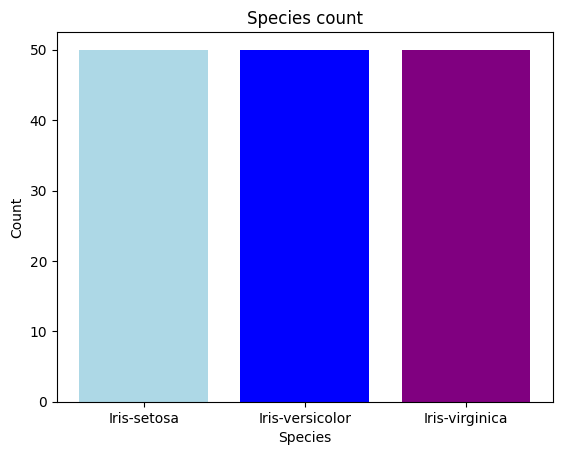

In [ ]:
species_counts = data['Species'].value_counts()
color = ['lightblue', 'blue', 'purple']
plt.bar(species_counts.index, species_counts.values,color=color)
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Species count')
plt.show()

The frequency of each species are equal in this data, equal to 150/3 = 50 for each of the species setosa, versicolor and virginca. This suggest lack of any bias that might happen if one species had higher count than the other.

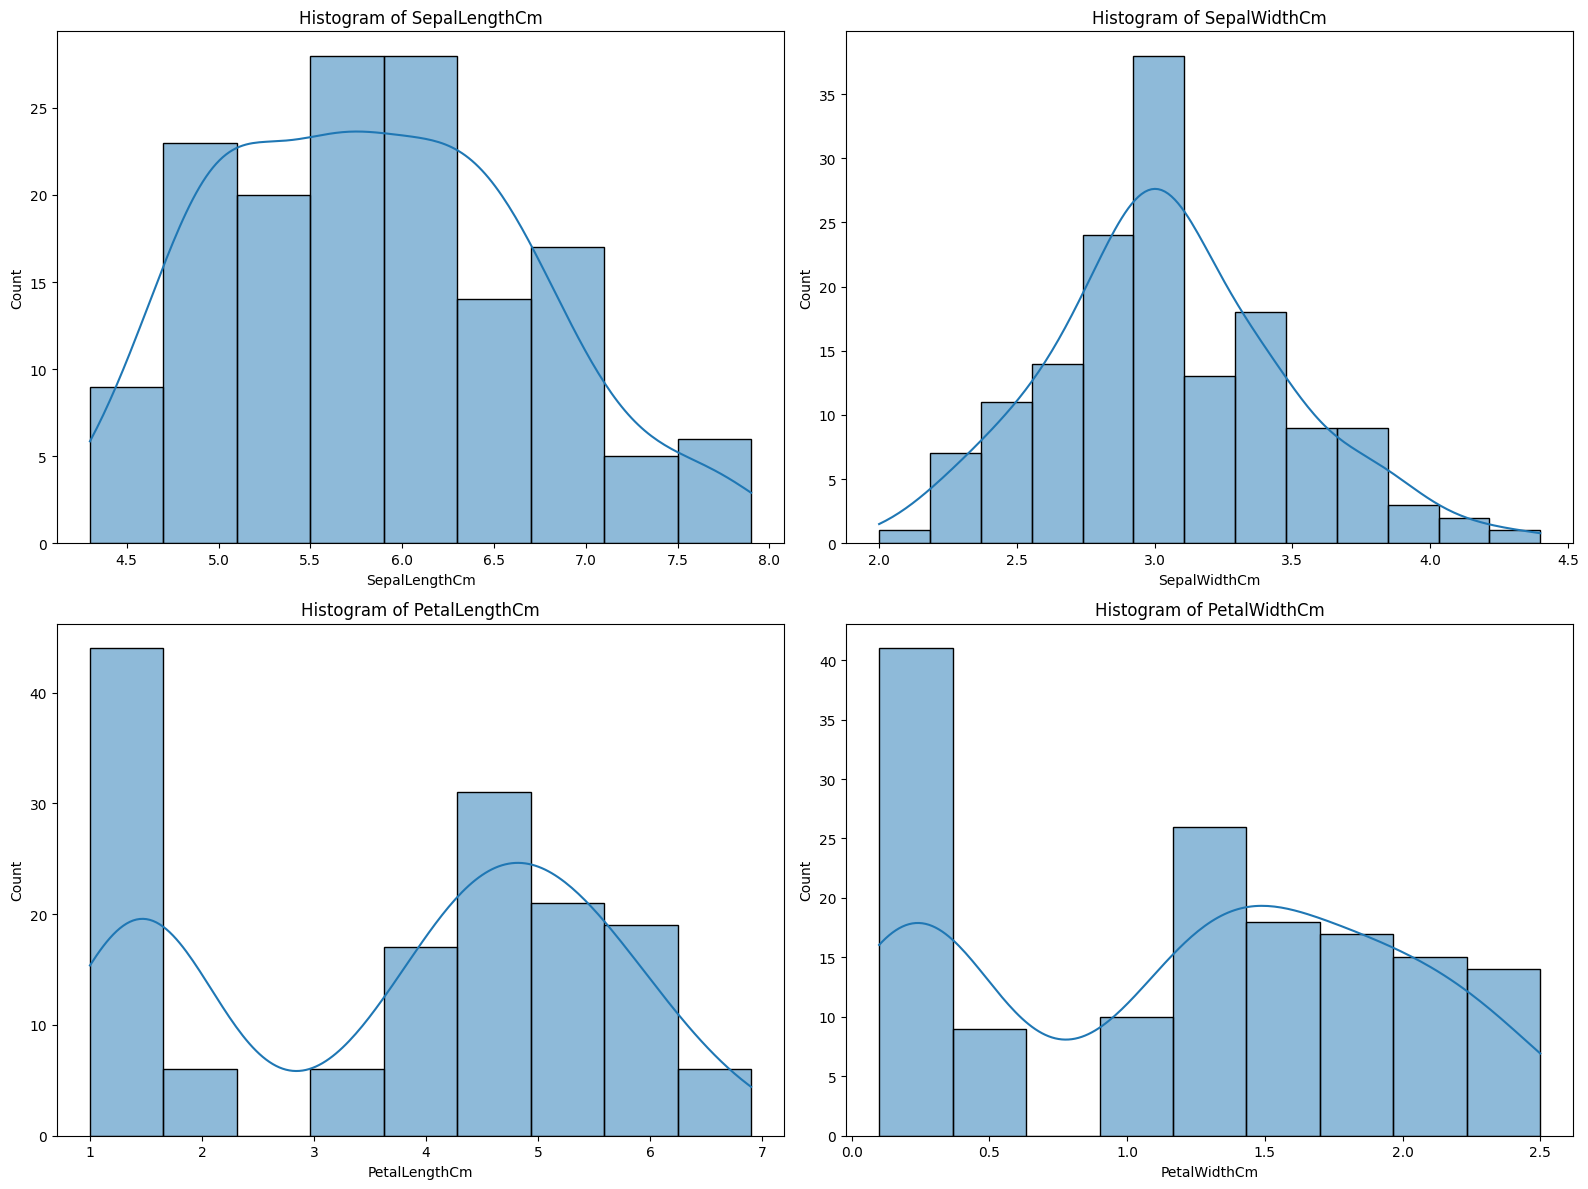

In [ ]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
axes = axs.flatten()
for i, feature in enumerate(features):
    sns.histplot(data=data, x=feature, kde=True, ax=axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Histogram of {feature}')

plt.tight_layout()
plt.show()

The sepal length data appears to follow a normal distribution, with most of the lengths centered around 5-6 cm, even though the peakedness in the curve is not much prominent.

The sepal width data also appears to follow a normal distribution, with most of the widths centered around 3 cm, and a prominent bell-shaped curve with unimodality.

The histogram shows two distinct groups in the petal length data,one group is centered around a petal length of 1-2 cm, and the other is more spread out, ranging from 3 to 7 cm.

Similar to petal length, petal width also shows two distinct groups. One group has a petal width of less than 1 cm, and the other ranges from 1 to 2.5 cm.

On an overall viewpoint, features showing clear differentation like petals(both length and width), can be a good indicator to segregate species of iris flower with shorter and wider petals and the other species with longer and narrower  petals.


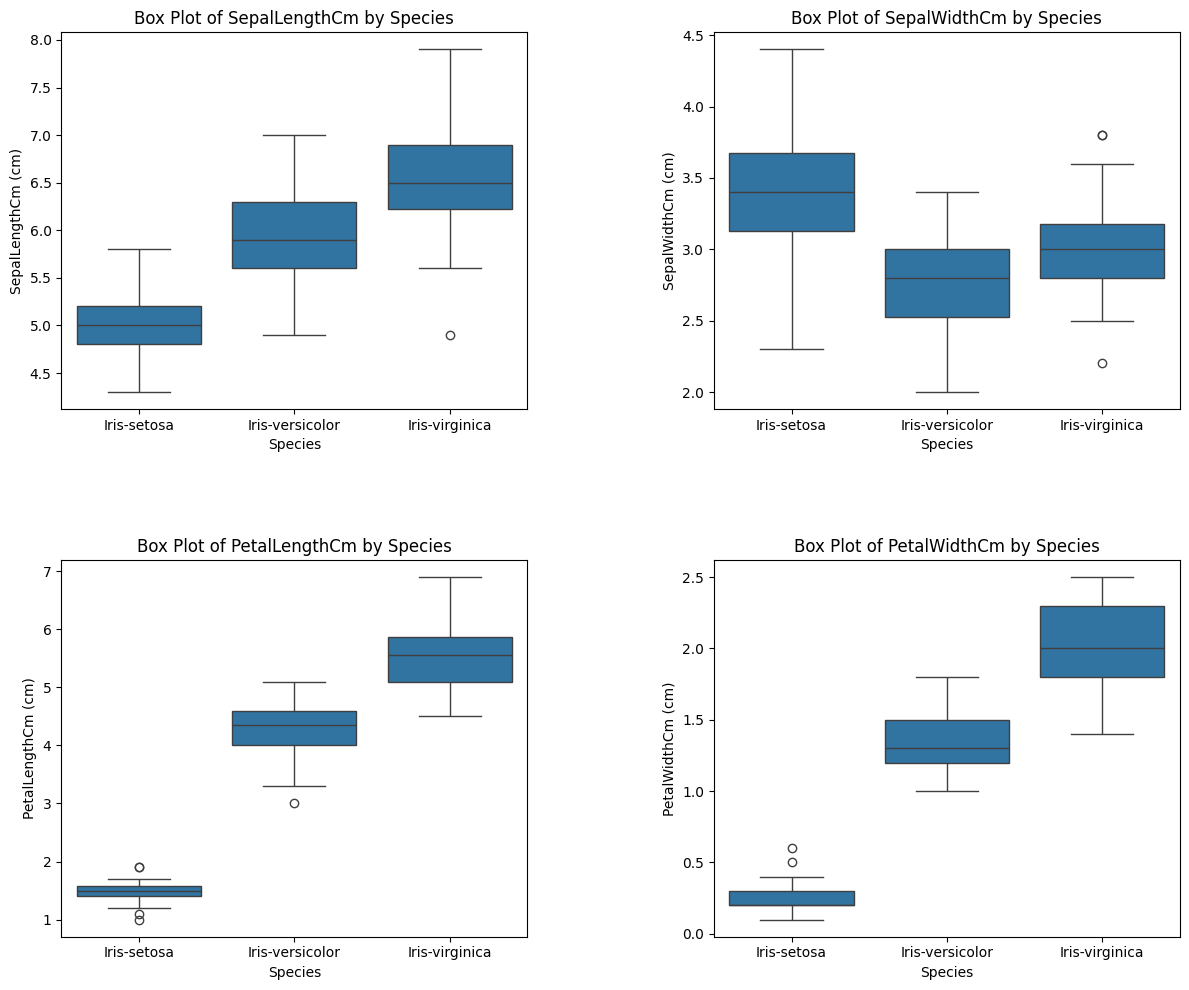

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()
for i, feature in enumerate(features):
    sns.boxplot(data=data, x='Species', y=feature, ax=axes[i])
    axes[i].set_xlabel('Species')
    axes[i].set_ylabel(f'{feature} (cm)')
    axes[i].set_title(f'Box Plot of {feature} by Species')

plt.tight_layout()
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

By understanding the box plots of each feature, we get an overall visualisation of each species of iris as under:

Iris setosa has smaller sepal and petal lengths, wider sepal width but narrower petal width.

Iris versicolor has longer sepal length but narrower sepal width, while the dimensions of petal length and widthwise are more or less similar.

Iris virginica has longest sepal and petal lengths along with widest petal width. However, the sepal width is smaller.

On a comparative viewpoint of all species, iris Virgnica has highest dimensions followed by Iris-versicolor.

## Data Preprocessing:



In [ ]:
categorical_columns = ['Species']
numerical_columns = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

In [ ]:
data["Species"]=data["Species"].map({'Iris-setosa': 0,'Iris-versicolor': 1,'Iris-virginica': 2}).astype(int)
print(data.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        0
1            4.9           3.0            1.4           0.2        0
2            4.7           3.2            1.3           0.2        0
3            4.6           3.1            1.5           0.2        0
4            5.0           3.6            1.4           0.2        0


As there is only one categorical column here showing the species of iris, a mapping is done on it to convert it to numerical type.

In [ ]:
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(data[numerical_columns])
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

Z-score normalization is being performed here to standardise all the numerical columns.

It assumes that the data follows a distribution that might not necessarily be Gaussian (normal), but is transformed in a way that its distribution will have a mean value 0 and standard deviation of 1.​

In [ ]:
data_reduced = data.drop(columns=numerical_columns)
dataset = pd.concat([scaled_numerical_df,data_reduced], axis=1)
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,0


A new dataframe is created henceforth, after mapping the categorical column and normalizing the remaining numerical columns.

## Correlation:

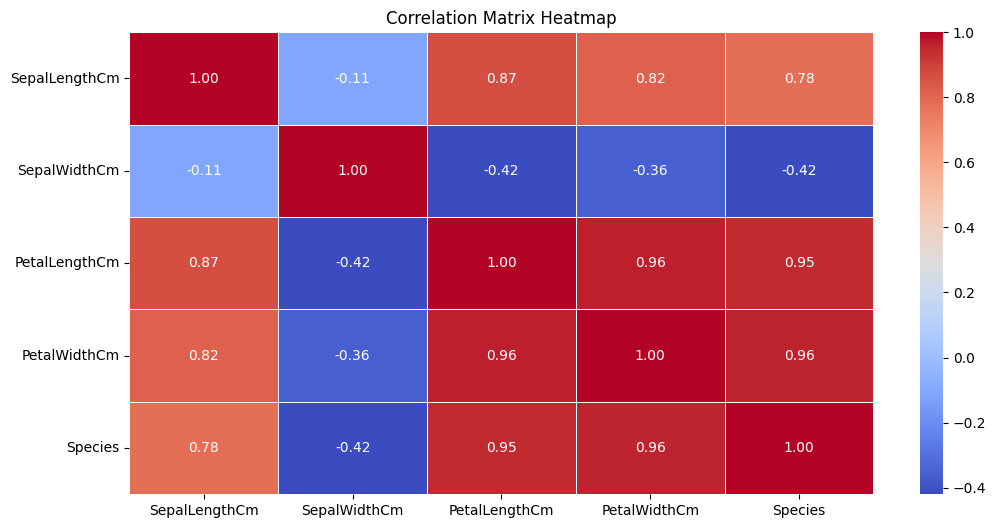

In [ ]:
correlation_matrix = dataset.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

There is good amount of correlation seen betwen the features of flowers. The heatmap is based on the standardized values to avoid any unseen discrepancy in values. For sepals and petals, we understand certain things as-

The sepal's length is highly correlated with the dimensions of petals, whereas its width is moderately correlated.

The petal's length is highly correlated with its own width, while with sepals, it is positively correlated with length and negatively with width. Similar pattern is observed for petal's width as well.

Overall, we can observe the dimensions of the features of flower to be closely correlated amongst each other, and also with the species category as well.

## Linear Discriminant Analysis using mathematical concepts:

### Feature wise Aggregation

In [ ]:
feature_means_iris = dataset.groupby('Species').mean()
feature_means_iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
0,-1.014579,0.842307,-1.304878,-1.255129
1,0.112282,-0.657184,0.285087,0.167409
2,0.902297,-0.185122,1.019792,1.087720


The average values of all features,like SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm for each species in the iris dataset, is calculated to get an idea about central tendency of each feature by species.

### Within class Scatter Matrix

In [ ]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'] #feature names used in the analysis
num_features = len(features) #number of features, which determines the size of the scatter matrices
withinclass_scatter_matrix = np.zeros((num_features, num_features))
for species, rows in dataset.groupby('Species'):
    rows = rows.drop(['Species'], axis=1)  # Drop the class column to only include features

    s = np.zeros((num_features, num_features))
    mc = feature_means_iris.loc[species].values.reshape(num_features, 1)  # Mean vector for current class
    for index, row in rows.iterrows(): # each row (iris flower instance) of the current species subset is transformed into a column vector
        x = row.values.reshape(num_features, 1)
        s += (x - mc).dot((x - mc).T) #computes the scatter of the current row around the class mean.
        # Subtracting the mean vector from the row vector, resulting in a deviation vector.
    withinclass_scatter_matrix += s

print(withinclass_scatter_matrix)

[[57.19414039 38.36522254 16.9597752   9.00954035]
 [38.36522254 91.21788053 10.68502072 14.94754387]
 [16.9597752  10.68502072  8.80215397  4.67538084]
 [ 9.00954035 14.94754387  4.67538084 10.6746122 ]]


We aggregate the variation of each feature around the mean for each class. The matrix helps to maximize the separability between classes by minimizing the variance within each class.

### Between class Scatter Matrix

In [ ]:
mean = dataset[features].mean() #overall mean of each feature across all classes
betweenclass_scatter_matrix = np.zeros((4, 4)) #Initializes the between-class scatter matrix as a 4x4 matrix filled with zeros
for species in feature_means_iris.index:
    n = len(dataset[dataset['Species'] == species].index)
    mc = feature_means_iris.loc[species].values.reshape(4,1) # reshapes the mean vector of the current class into a column vector
    m = mean.values.reshape(4,1) # reshapes the overall mean vector into a column vector.
    betweenclass_scatter_matrix += n * (mc - m).dot((mc - m).T)
    #computes the deviation of the class mean from the overall mean, and the outer product of this deviation with itself.

print(betweenclass_scatter_matrix)

[[ 92.80585961 -54.77061003 113.8033484  113.68350465]
 [-54.77061003  58.78211947 -73.76243518 -68.42915731]
 [113.8033484  -73.76243518 141.19784603 139.73818372]
 [113.68350465 -68.42915731 139.73818372 139.3253878 ]]


The between-class scatter matrix quantifies how separated the different classes' means are from the overall mean of the dataset. It is done by by aggregating the weighted scatter of each class's mean from the overall mean.

### Eigen Vector and Eigen Values:

In [ ]:
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(withinclass_scatter_matrix).dot(betweenclass_scatter_matrix))

The eigenvectors are the directions (linear discriminants) that best separate the classes when the data is projected onto them.

The eigenvalues represent the magnitude of the variance along the directions given by their corresponding eigenvectors in the transformed space, indicating the effectiveness of the corresponding eigenvectors.

In [ ]:
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
eigen_pairs = sorted(eigen_pairs, key=lambda x: x[0], reverse=True)
for pair in eigen_pairs:
  print(pair[0])

32.27195779972985
0.2775668638400505
5.4555957818764245e-15
1.7843715045030026e-15


The eigenvalues are sorted in descending order as their magnitude indicates the importance or effectiveness of the corresponding eigenvectors in maximizing the between-class scatter while minimizing the within-class scatter.

Higher the magintude, more is its effectiveness.

In [ ]:
sum_of_eigen_values = sum(eigen_values)
print('Explained Variance')
for i, pair in enumerate(eigen_pairs):
   print('Eigenvector {}: {}'.format(i, (pair[0]/sum_of_eigen_values).real))

Explained Variance
Eigenvector 0: 0.9914724756595074
Eigenvector 1: 0.008527524340492414
Eigenvector 2: 1.6760907688407626e-16
Eigenvector 3: 5.482020161419155e-17


The sum of all eigenvalues is then calculated. It is used as a denominator in calculating the proportion of variance explained by each eigenvector.

### Data Segregation

In [ ]:
y=data["Species"]
X = dataset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

### Graphical Visualization

In [ ]:
W_matrix = np.hstack((eigen_pairs[0][1].reshape(4,1), eigen_pairs[1][1].reshape(4,1))).real
X_lda = np.array(X.dot(W_matrix))

This is a transformation matrix which is used to transform the data from its original feature space into a lower-dimensional space and separating the classes as well.

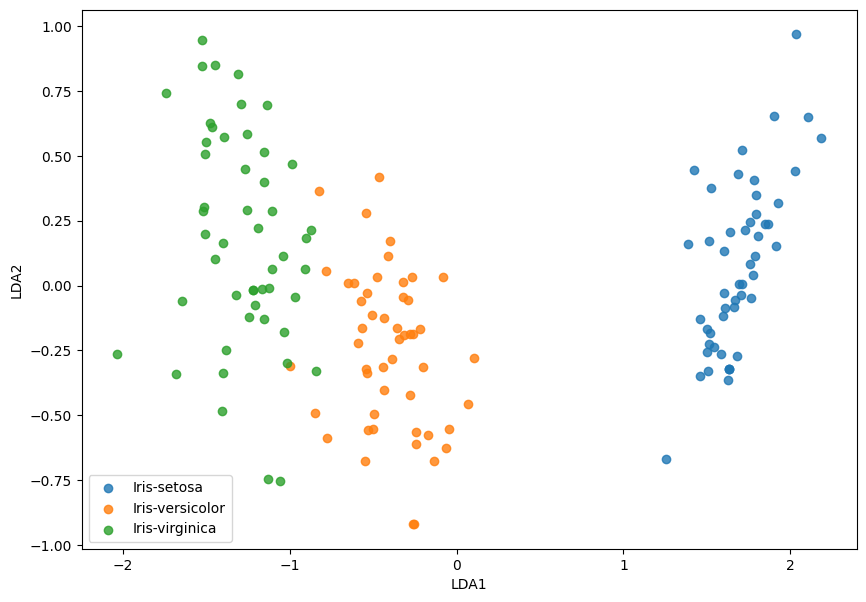

In [ ]:
plt.figure(figsize=(10, 7))
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
plt.xlabel('LDA1')
plt.ylabel('LDA2')
for i, species_name in enumerate(species):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], label=species_name, alpha=0.8)
plt.legend()
plt.show()

The graph iterates through the unique species of flowers, plotting the data points corresponding to each class. Data points belonging to the same class are plotted with the same color. The axes based on the LDA components correspond to the directions of maximum class separation.

The LDA successfully distinguishes each class. Morever,the clear separation of the third species from the others indicates that the model has maximized the class separability for that particular species.

## Linear Discriminant Analysis using scikit-learn library

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda_model = LDA()
X_lda = lda_model.fit_transform(X, y)

Using the inbuilt class, the LDA model is trained to find the linear combinations of features that best separate the species of iris.

In [ ]:
lda_model.explained_variance_ratio_

array([0.99147248, 0.00852752])

The proportion of total variance explained by each of the linear discriminants is given in the form of array. As the first LD has a significantly higher explained variance ratio, it gives a good class separability along this dimension.

In [ ]:
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

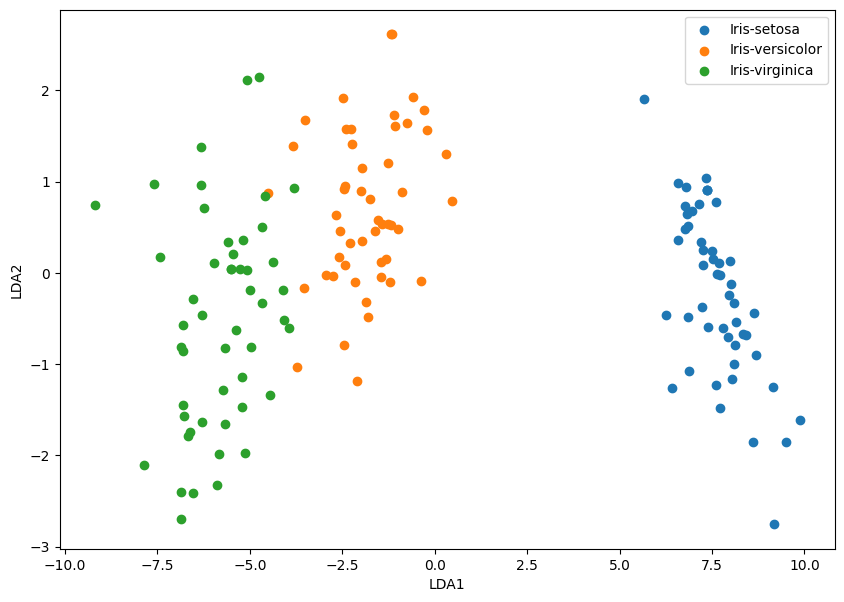

In [ ]:
plt.figure(figsize=(10, 7))
plt.xlabel('LDA1')
plt.ylabel('LDA2')
for i, species_name in enumerate(species):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], label=species_name)
plt.legend()
plt.show()

The visualization helps to understand the effectiveness of LDA in reducing dimensionality and separating classes. The data points are distinctively grouped by species, with greater clarity for setosa species and few overlapped points for other two, overall indicating good class separability.

## Dimensionality reduction and Classification using LDA:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

### LDA model on training data

In [ ]:
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

After dividing the data in 80:20 ratio for training & testing, the LDA model is implemented on the training dataset.

The original data had four dimensions corresponding to four features: Sepal Length, Sepal Width, Petal Length, and Petal Width. In this model, by choosing number of components as 2, it is reduced from four-dimensional space to a two-dimensional space.

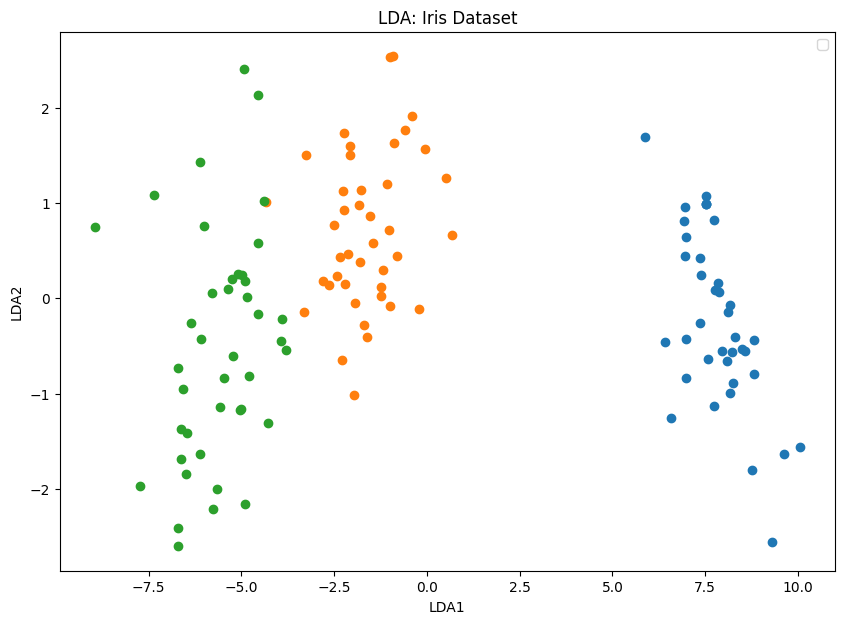

In [ ]:
plt.figure(figsize=(10, 7))
labels = np.unique(y_train)
for i, label in enumerate(labels):
    plt.scatter(X_train_lda[y_train == label, 0], X_train_lda[y_train == label, 1])
plt.title('LDA: Iris Dataset')
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.legend()
plt.show()

With very few overlapping points for versicolor and verginica and a clear distinctive class separation for setosa, an overall good class separability is seen on the training data, even after reducing the dimensions.

### Model Accuracy

In [ ]:
y_pred = lda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:',accuracy)

Accuracy: 0.9333333333333333


Accuracy is defined as the ratio of correctly predicted instances to the total instances in the dataset, expressed as a decimal between 0 and 1. A very high accuracy of 0.93 is obtained here, confirming the efficiency of our LDA model.

## Conclusions:
The results highlight LDA's utility in feature selection and dimensionality reduction for classification tasks. All the 3 species of Iris flower were discriminated with clarity. The distinct placement of the third species on the right side of the graph shows that there is a high variance between this species and the other two, in terms of the LDA components. By reducing the data from a four-dimensional to a two-dimensional space and fitting on 80% of the total data, we observe a similar results. Also, the LDA model successfully classifies the test data as well, with a very high accuracy of 93%. Therefore, the LDA implementation on the Iris dataset effectively reduces the dimensionality of the data while maintaining the separability between the different species, as seen by the visualization and high classification accuracy.